In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Reading the dataset to dataframe
# Dropping the InvoiceID column
df = pd.read_csv('supermarket-sales-data.csv')
df.drop(columns = ['InvoiceID'], axis = 1, inplace = True)
df.head()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [3]:
df['Branch'].unique(), df['Branch'].value_counts()

(array(['A', 'C', 'B'], dtype=object),
 Branch
 A    340
 B    332
 C    328
 Name: count, dtype: int64)

In [4]:
df['CustomerType'].unique(), df['CustomerType'].value_counts()

(array(['Member', 'Normal'], dtype=object),
 CustomerType
 Member    501
 Normal    499
 Name: count, dtype: int64)

In [5]:
df['ProductType'].unique(), df['ProductType'].value_counts()

(array(['Health and beauty', 'Electronic accessories',
        'Home and lifestyle', 'Sports and travel', 'Food and beverages',
        'Fashion accessories'], dtype=object),
 ProductType
 Fashion accessories       178
 Food and beverages        174
 Electronic accessories    170
 Sports and travel         166
 Home and lifestyle        160
 Health and beauty         152
 Name: count, dtype: int64)

In [6]:
df['PaymentType'].unique(), df['PaymentType'].value_counts()

(array(['UPI', 'Cash', 'Credit card'], dtype=object),
 PaymentType
 UPI            345
 Cash           344
 Credit card    311
 Name: count, dtype: int64)

#### For Gender

In [7]:
temp = df.copy()
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(temp.iloc[:,[0,1,3,8]])
ohe_df = pd.DataFrame(data = X_ohe, columns=ohe.get_feature_names_out())

In [8]:
df_gender = pd.concat([ohe_df, temp.iloc[:,[4,5,6,7,9,2]]] , axis = 1)
df_gender.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,UnitPrice,Quantity,Tax,Total,Rating,Gender
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,74.69,7,26.1415,548.9715,9.1,Female
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,9.6,Female
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.33,7,16.2155,340.5255,7.4,Male
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.22,8,23.2880,489.0480,8.4,Male
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,86.31,7,30.2085,634.3785,5.3,Male


In [9]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_gender.iloc[:,:-1], df_gender.iloc[:,-1], test_size=0.3, random_state=0)

In [10]:
# GridSearch Decision Tree Model
# TN is {0,0}, FN is {1,0}, TP {1,1} and FP {0,1}

clf1 = DecisionTreeClassifier(random_state = 0)
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[4,6,8,10,15,20],
     'max_features':['sqrt', 'log2']
}
newclf1 = GridSearchCV(clf1, params, cv=5, n_jobs=-1)
newclf1.fit(X_train, y_train)
y_pred = newclf1.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)
print(f'Best Parameters: {newclf1.best_params_}\n')
print(f'Confusion Matrix:\n{confmat}\n')

tn, fp, fn, tp = confmat.ravel()
precision1 = round(tp/(tp+fp),3)
recall1 = round(tp/(tp+fn),3)
accuracy1= round((tp+tn)/(tp+tn+fp+fn),3)
print(f'Overall accuracy: {accuracy1}\nPrecision : {precision1}\nRecall : {recall1}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}

Confusion Matrix:
[[107  42]
 [ 90  61]]

Overall accuracy: 0.56
Precision : 0.592
Recall : 0.404


In [11]:
# GridSearch Random Forest Model
# TN is {0,0}, FN is {1,0}, TP {1,1} and FP {0,1}

clf2 = RandomForestClassifier(n_jobs = -1, random_state = 0)
params = {
    'n_estimators':[50,100,200,300,400,500],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2']
}
newclf2 = GridSearchCV(clf2, params, cv=5, n_jobs=-1)
newclf2.fit(X_train, y_train)
y_pred = newclf2.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)
print(f'Best Parameters: {newclf2.best_params_}\n')
print(f'Confusion Matrix:\n{confmat}\n')

tn, fp, fn, tp = confmat.ravel()
precision2 = round(tp/(tp+fp),3)
recall2 = round(tp/(tp+fn),3)
accuracy2= round((tp+tn)/(tp+tn+fp+fn),3)
print(f'Overall accuracy: {accuracy2}\nPrecision : {precision2}\nRecall : {recall2}')

Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}

Confusion Matrix:
[[83 66]
 [83 68]]

Overall accuracy: 0.503
Precision : 0.507
Recall : 0.45


In [12]:
data1 = [[str(newclf1.best_estimator_), accuracy1, precision1, recall1],
        [str(newclf2.best_estimator_), accuracy2, precision2, recall2]]

In [13]:
report1 = pd.DataFrame(data1, columns= ['Model', 'Overall accuracy', 'Precision', 'Recall'])
report1

,Model,Overall accuracy,Precision,Recall
0,"DecisionTreeClassifier(criterion='entropy', ma...",0.560,0.592,0.404
1,"RandomForestClassifier(n_estimators=300, n_job...",0.503,0.507,0.450


#### For Rating

In [14]:
temp = df.copy()
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(temp.iloc[:,[0,1,2,3,8]])
ohe_df = pd.DataFrame(data = X_ohe, columns=ohe.get_feature_names_out())
df_rating = pd.concat([ohe_df, temp.iloc[:,[4,5,6,7,9]]] , axis = 1)
df_rating.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,Gender_Female,Gender_Male,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,...,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,UnitPrice,Quantity,Tax,Total,Rating
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,74.69,7,26.1415,548.9715,9.1
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,9.6
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,46.33,7,16.2155,340.5255,7.4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,58.22,8,23.2880,489.0480,8.4
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,86.31,7,30.2085,634.3785,5.3


In [15]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_rating.iloc[:,:-1], df_rating.iloc[:,-1], test_size=0.3, random_state=0)

In [16]:
# GridSearch Decision Tree Model

reg1 = DecisionTreeRegressor(criterion='absolute_error', random_state = 0)
params = {
    'max_depth':[2,3,4],
    'max_features':['sqrt', 'log2']
}
newreg1 = GridSearchCV(reg1, params, cv=5, n_jobs=-1)
newreg1.fit(X_train, y_train)
y_pred = newreg1.predict(X_test)
mae1 = round(mean_absolute_error(y_test, y_pred),3)
print(f'Best Parameters: {newreg1.best_params_}\n')
print(f'Mean Absolute Error: {mae1}\n')

Best Parameters: {'max_depth': 2, 'max_features': 'sqrt'}

Mean Absolute Error: 1.561



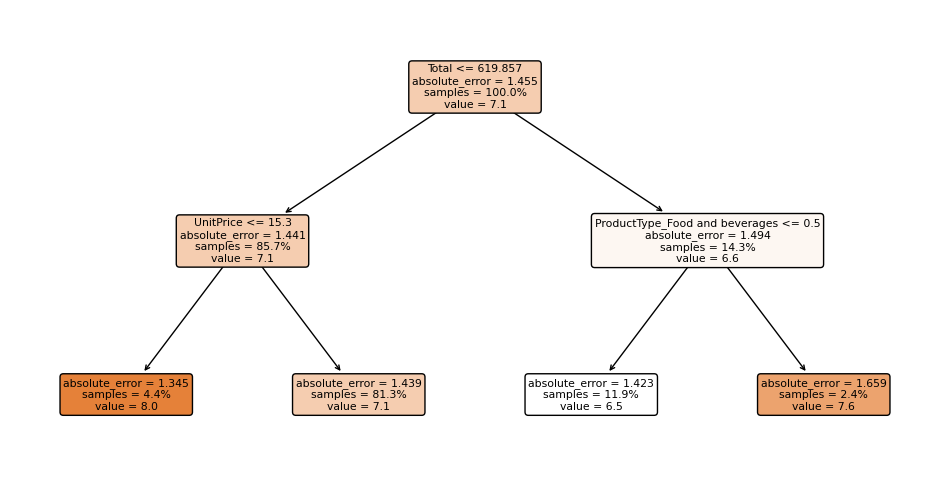

In [17]:
fig = plt.figure(figsize=(12, 6))
_ = tree.plot_tree(
    newreg1.best_estimator_,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    proportion=True,
)

In [18]:
# Default Linear Regression Model

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
mae2 = round(mean_absolute_error(y_test, y_pred),3)
print(f'Mean Absolute Error: {mae2}\n')

Mean Absolute Error: 1.538



In [19]:
reg3 = Ridge(random_state=0)

params = {
    'alpha':[0.5,1,1.5,2,2.5,3]
}
newreg3 = GridSearchCV(reg3, params, cv=5, n_jobs=-1)
newreg3.fit(X_train, y_train)
y_pred = newreg3.predict(X_test)
mae3 = round(mean_absolute_error(y_test, y_pred),3)
print(f'Best Parameters: {newreg3.best_params_}\n')
print(f'Mean Absolute Error: {mae3}\n')

Best Parameters: {'alpha': 3}

Mean Absolute Error: 1.538



In [20]:
reg4 = Lasso(random_state=0)

params = {
    'alpha':[0.5,1,1.5,2,2.5,3]
}
newreg4 = GridSearchCV(reg4, params, cv=5, n_jobs=-1)
newreg4.fit(X_train, y_train)
y_pred = newreg4.predict(X_test)
mae4 = round(mean_absolute_error(y_test, y_pred),3)
print(f'Best Parameters: {newreg4.best_params_}\n')
print(f'Mean Absolute Error: {mae4}\n')

Best Parameters: {'alpha': 1}

Mean Absolute Error: 1.535



In [21]:
reg5 = ElasticNet(random_state=0)

params = {
    'alpha':[0.5,1,1.5,2,2.5,3],
    'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}
newreg5 = GridSearchCV(reg5, params, cv=5, n_jobs=-1)
newreg5.fit(X_train, y_train)
y_pred = newreg5.predict(X_test)
mae5 = round(mean_absolute_error(y_test, y_pred),3)
print(f'Best Parameters: {newreg5.best_params_}\n')
print(f'Mean Absolute Error: {mae5}\n')

Best Parameters: {'alpha': 1, 'l1_ratio': 0.7}

Mean Absolute Error: 1.535



In [22]:
data2 = [[str(newreg1.best_estimator_), mae1],
         [str(reg2), mae2],
         [str(newreg3.best_estimator_), mae3],
         [str(newreg4.best_estimator_), mae4],
         [str(newreg5.best_estimator_), mae5]]

In [23]:
report2 = pd.DataFrame(data2, columns= ['Model', 'MAE'])
report2

,Model,MAE
0,DecisionTreeRegressor(criterion='absolute_erro...,1.561
1,LinearRegression(),1.538
2,"Ridge(alpha=3, random_state=0)",1.538
3,"Lasso(alpha=1, random_state=0)",1.535
4,"ElasticNet(alpha=1, l1_ratio=0.7, random_state=0)",1.535
